In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s=["I love this sandwich","This is an amazing place","I feel very good about these beers","This is my best work",
   "That is an awesome work","I love to dance","I  am sick and tired of this place",
   "I do not like the taste of this juice","My boss is horrible","What a bad locality to stay",
   "We will have good fun tomorrow","I do not like this restaurant","I feel very bad today",
   "I couldn’t solve this problem","I love to play football","I hate fast music"]
l=["pos","pos","pos","pos","pos","pos","neg","neg","neg","neg","pos","neg","neg","neg","pos","neg"]

In [3]:
df=pd.DataFrame({"statement":s,"label":l})
df.to_csv("text.csv",index=False,encoding='utf-8')

In [4]:
print(df)

                                statement label
0                    I love this sandwich   pos
1                This is an amazing place   pos
2      I feel very good about these beers   pos
3                    This is my best work   pos
4                 That is an awesome work   pos
5                         I love to dance   pos
6      I  am sick and tired of this place   neg
7   I do not like the taste of this juice   neg
8                     My boss is horrible   neg
9             What a bad locality to stay   neg
10         We will have good fun tomorrow   pos
11          I do not like this restaurant   neg
12                  I feel very bad today   neg
13          I couldn’t solve this problem   neg
14                I love to play football   pos
15                      I hate fast music   neg


In [5]:
#splitting into test and training dataset
x=df['statement']
y=df['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [6]:
print(x_train)

6     I  am sick and tired of this place
10        We will have good fun tomorrow
4                That is an awesome work
1               This is an amazing place
14               I love to play football
0                   I love this sandwich
15                     I hate fast music
9            What a bad locality to stay
8                    My boss is horrible
12                 I feel very bad today
11         I do not like this restaurant
5                        I love to dance
Name: statement, dtype: object


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect=TfidfVectorizer()
Tfidf_vect.fit(x)
Train_X_Tfidf=Tfidf_vect.transform(x_train)
Test_X_Tfidf=Tfidf_vect.transform(x_test)


In [8]:
print(Train_X_Tfidf)

  (0, 43)	0.414201015861098
  (0, 42)	0.23133718345731544
  (0, 35)	0.414201015861098
  (0, 30)	0.3607167735139124
  (0, 29)	0.3607167735139124
  (0, 4)	0.414201015861098
  (0, 1)	0.414201015861098
  (1, 50)	0.4167237888361141
  (1, 48)	0.4167237888361141
  (1, 46)	0.4167237888361141
  (1, 19)	0.4167237888361141
  (1, 17)	0.36291379016285535
  (1, 16)	0.4167237888361141
  (2, 51)	0.4344398441142798
  (2, 39)	0.4988551627631241
  (2, 21)	0.35328614020518057
  (2, 5)	0.4988551627631241
  (2, 3)	0.4344398441142798
  (3, 42)	0.306049296648128
  (3, 30)	0.47721301510305897
  (3, 21)	0.3880692492769788
  (3, 3)	0.47721301510305897
  (3, 2)	0.5479704026854768
  (4, 44)	0.434635502834722
  (4, 31)	0.5577562009297686
  :	:
  (5, 25)	0.5625005457678904
  (6, 26)	0.5773502691896257
  (6, 18)	0.5773502691896257
  (6, 13)	0.5773502691896257
  (7, 49)	0.47860244256547524
  (7, 44)	0.37295437134649556
  (7, 37)	0.47860244256547524
  (7, 24)	0.47860244256547524
  (7, 6)	0.41680228262885405
  (8, 27)	0

In [9]:
from sklearn.svm import SVC   #Support Vector Machine
classifier=SVC(C=1.0,kernel='linear',degree=3,gamma='auto')
classifier.fit(Train_X_Tfidf,y_train)

SVC(gamma='auto', kernel='linear')

In [10]:
y_pred=classifier.predict(Test_X_Tfidf)
print(y_pred)

['neg' 'neg' 'neg' 'neg']


In [11]:
#Creating confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2 0]
 [2 0]]


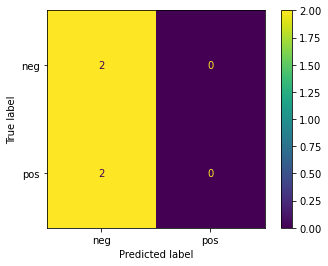

In [12]:
##Confusion matrix display

from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [13]:
training_score=classifier.score(Train_X_Tfidf,y_train)
test_score=classifier.score(Test_X_Tfidf,y_test)
print(training_score)
print(test_score)

1.0
0.5


In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: {}'.format(precision_score(y_test,y_pred,pos_label='neg')))
print('Recall score: {}'.format(recall_score(y_test,y_pred,pos_label='neg')))
print('F1 score: {}'.format(f1_score(y_test,y_pred,pos_label='neg')))

Accuracy score: 0.5
Precision score: 0.5
Recall score: 1.0
F1 score: 0.6666666666666666
